## Exploratory Data Analysis on Terrorism Dataset
### Author: Dhruva Nalla

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [3]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

In [4]:
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))

There are 2909 rows and 135 columns in the dataset


In [6]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Total columns of the dataset

In [7]:
No_of_cols=terrorism_df.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)

There are total 135 columns in the data


## Renaming the columns

In [8]:
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [9]:
terrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


## Selecting only the required columns

In [10]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [11]:
terrorism_df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


## Rows and columns

In [12]:
terrorism_df.shape

(2909, 12)

## Checking for the null values

In [13]:
terrorism_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State              10
City                0
Attack_type         0
Target_type         0
Target_subtype    108
Gang_name           0
Weapon_type         0
dtype: int64

## Filling the NaN values

In [14]:
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

In [15]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [16]:
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [17]:
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [18]:
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
2904,1975,3,27,Spain,Western Europe,Biscay,Bilbao,Bombing/Explosion,Private Citizens & Property,Memorial/Cemetery/Monument,Basque Fatherland and Freedom (ETA),Explosives
2905,1975,3,27,Spain,Western Europe,Gipuzcoa,Legazpi,Bombing/Explosion,Business,Retail/Grocery/Bakery,Basque Fatherland and Freedom (ETA),Explosives
2906,1975,3,27,United States,North America,California,Berkeley,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",Red Guerilla Family,Explosives
2907,1975,3,27,United States,North America,California,Los Angeles,Bombing/Explosion,Tourists,Other Facility,Cuban Action,Explosives


In [19]:
terrorism_df.shape

(2909, 12)

In [20]:
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

In [21]:
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [22]:
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [23]:
terrorism_df.columns.nunique()

12

In [ ]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


In [24]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia']


In [25]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [26]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime']


In [ ]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [27]:
print(terrorism_df['Gang_name'].nunique())

208


In [28]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological']


In [29]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            2909 non-null   int64 
 1   Month           2909 non-null   int64 
 2   Day             2909 non-null   int64 
 3   Country         2909 non-null   object
 4   Region          2909 non-null   object
 5   State           2909 non-null   object
 6   City            2909 non-null   object
 7   Attack_type     2909 non-null   object
 8   Target_type     2909 non-null   object
 9   Target_subtype  2909 non-null   object
 10  Gang_name       2909 non-null   object
 11  Weapon_type     2909 non-null   object
dtypes: int64(3), object(9)
memory usage: 272.8+ KB


In [ ]:
terrorism_df.describe()

,Year,Month,Day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644
std,13.259430,3.388303,8.814045
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


In [30]:
terrorism_df['Country'].value_counts().head(10)

United States         971
United Kingdom        811
Argentina             194
West Germany (FRG)    118
Spain                 108
France                 64
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Name: Country, dtype: int64

In [31]:
terrorism_df['Region'].value_counts().head(10)

Western Europe                 1243
North America                  1004
South America                   305
Middle East & North Africa      213
Southeast Asia                   37
Central America & Caribbean      32
Sub-Saharan Africa               24
Eastern Europe                   21
Australasia & Oceania            12
East Asia                        10
Name: Region, dtype: int64

In [ ]:
terrorism_df['State'].value_counts().head(10)

Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

In [32]:
terrorism_df['Target_subtype'].value_counts().head(10)

Religion Identified                                        307
Military Personnel (soldiers, troops, officers, forces)    252
Bank/Commerce                                              184
Embassy/Consulate                                          182
Retail/Grocery/Bakery                                      132
Police Security Forces/Officers                            123
School/University/Educational Building                     111
others                                                     108
Government Building/Facility/Office                        104
Multinational Corporation                                  104
Name: Target_subtype, dtype: int64

In [33]:
terrorism_df['City'].value_counts().head(10)

Belfast          434
New York City    196
Buenos Aires     102
Unknown           62
Los Angeles       59
San Francisco     54
London            54
Paris             43
Montevideo        42
Ankara            38
Name: City, dtype: int64

In [34]:
terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      1293
Assassination                           711
Facility/Infrastructure Attack          370
Armed Assault                           293
Hostage Taking (Kidnapping)             157
Hijacking                                41
Hostage Taking (Barricade Incident)      22
Unknown                                  12
Unarmed Assault                          10
Name: Attack_type, dtype: int64

In [35]:
terrorism_df['Target_type'].value_counts().head(10)

Business                        662
Private Citizens & Property     517
Military                        490
Government (Diplomatic)         292
Police                          227
Government (General)            224
Educational Institution         119
Airports & Aircraft             104
Terrorists/Non-State Militia     55
Utilities                        53
Name: Target_type, dtype: int64

In [36]:
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                                 549
Irish Republican Army (IRA)                             463
Left-Wing Militants                                     169
Protestant extremists                                   119
Black September                                         119
Ulster Volunteer Force (UVF)                             91
Black Nationalists                                       82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)     76
Student Radicals                                         71
Ulster Freedom Fighters (UFF)                            59
Name: Gang_name, dtype: int64

In [37]:
terrorism_df['Weapon_type'].value_counts().head(5)

Explosives    1415
Firearms       870
Incendiary     399
Unknown        186
Melee           22
Name: Weapon_type, dtype: int64

### Visualizing the dataset

#### Attack by weapons type

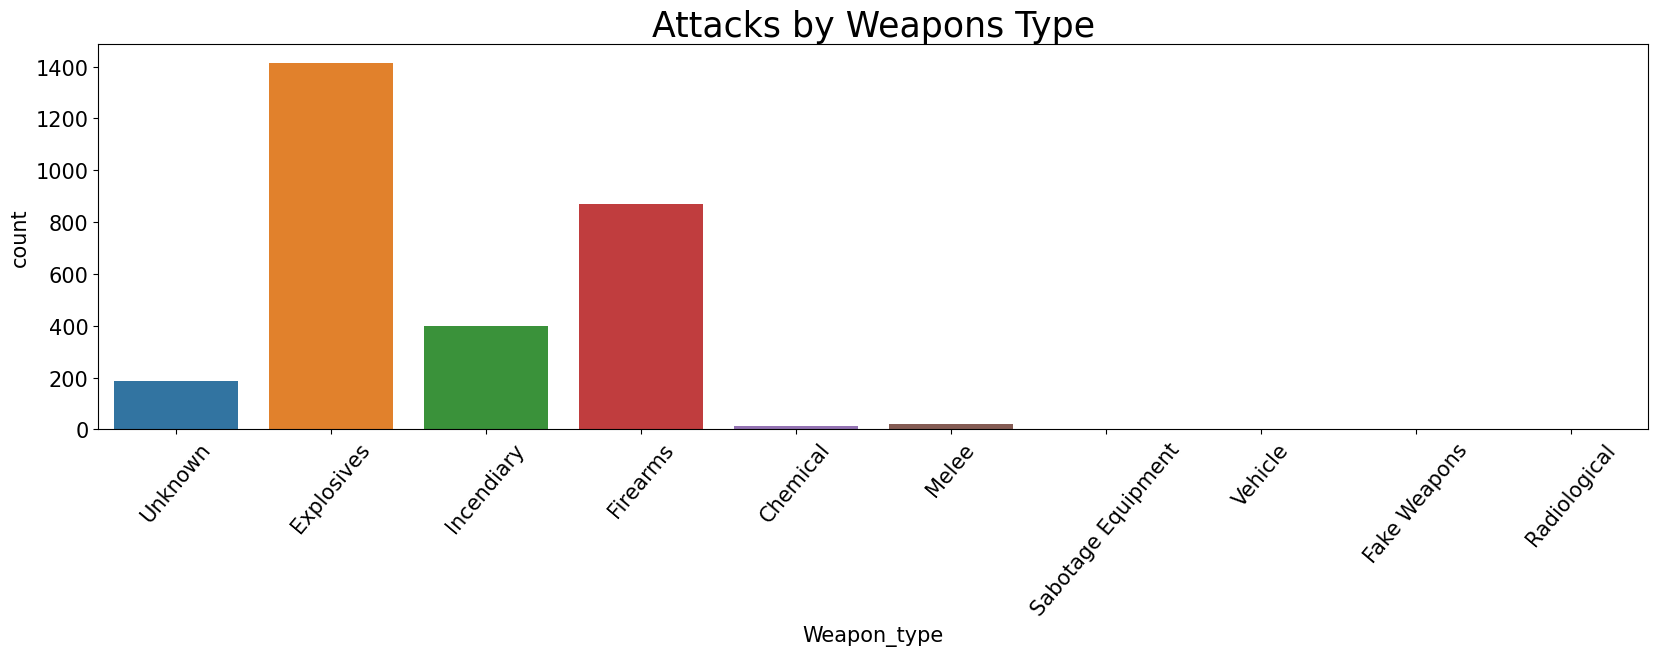

In [52]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 50)
plt.title('Attacks by Weapons Type', fontsize = 25)
sns.countplot(x=terrorism_df.Weapon_type);

#### Attacks by year

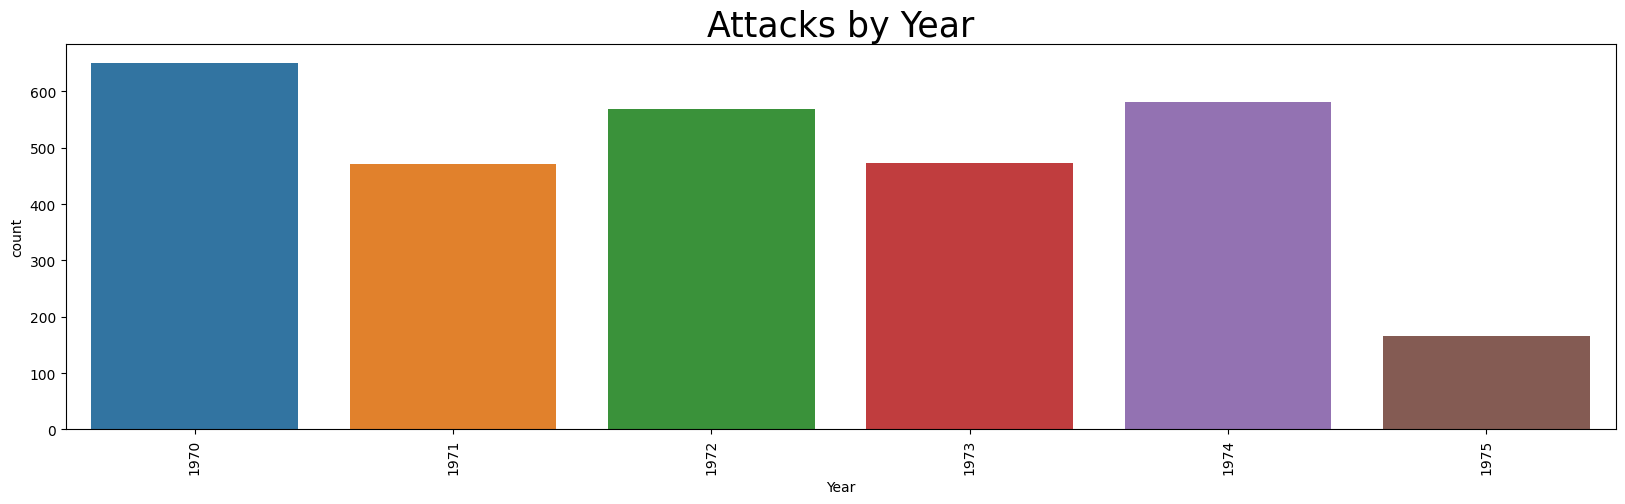

In [39]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year', fontsize = 25)
sns.countplot(x=terrorism_df.Year);

#### Attacks by month

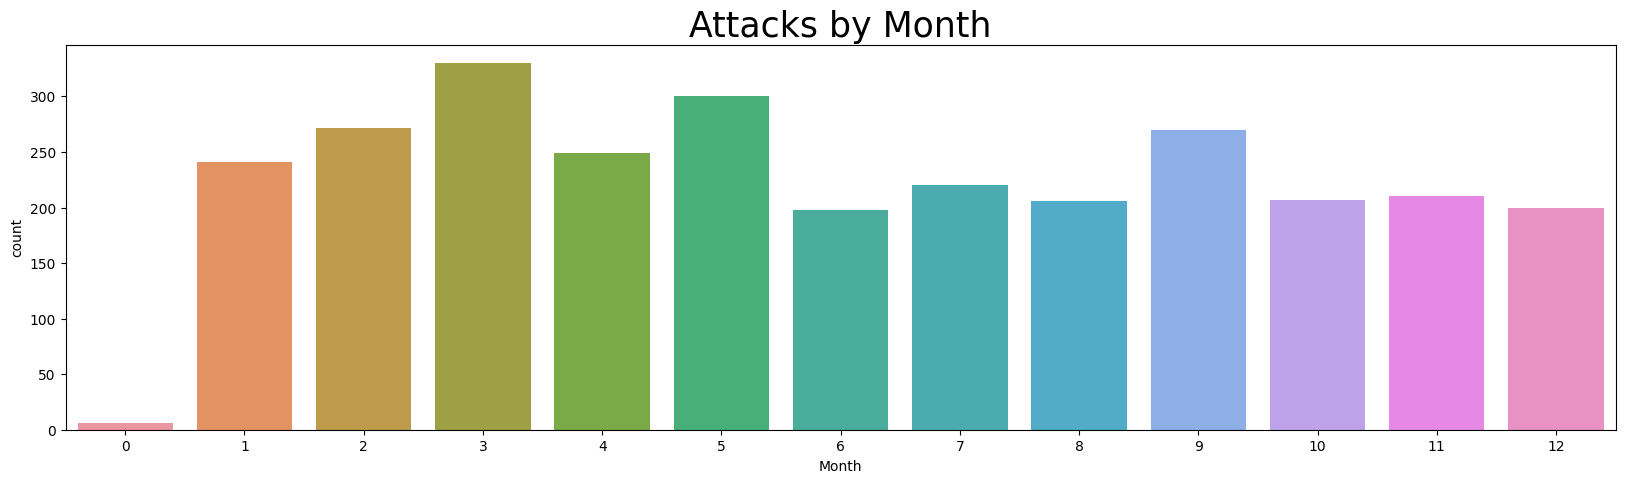

In [40]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month', fontsize = 25)
sns.countplot(x=terrorism_df.Month);

#### Attacks by day

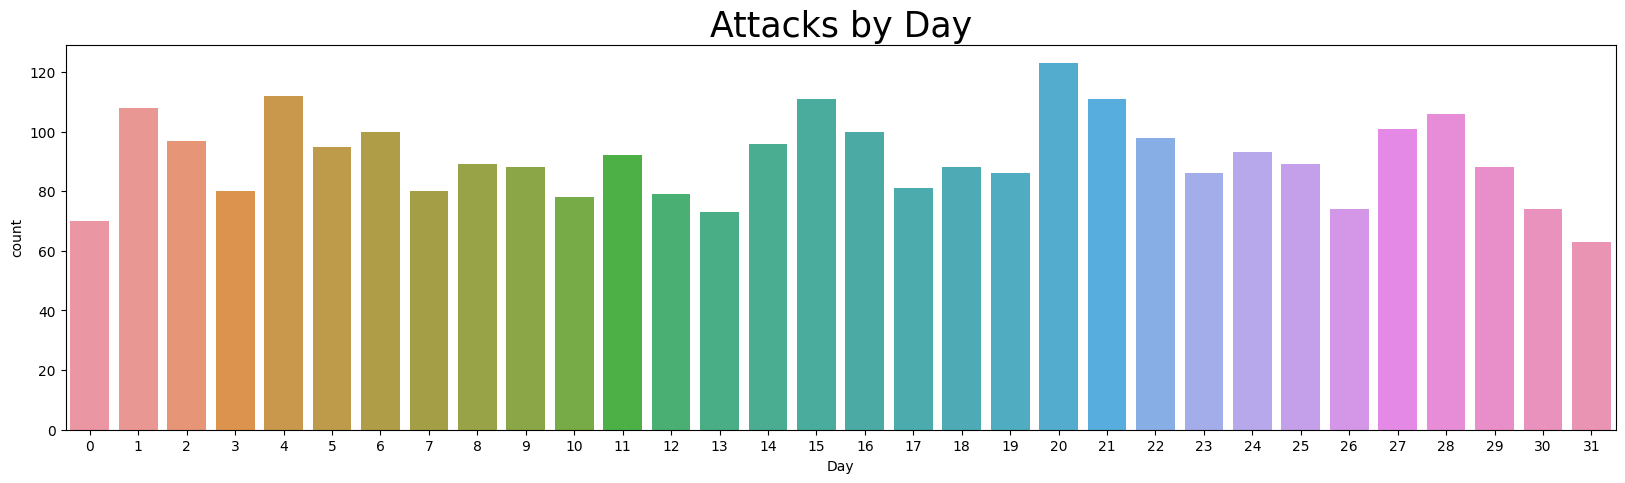

In [41]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day', fontsize = 25)
sns.countplot(x=terrorism_df.Day);

#### Attacks by region

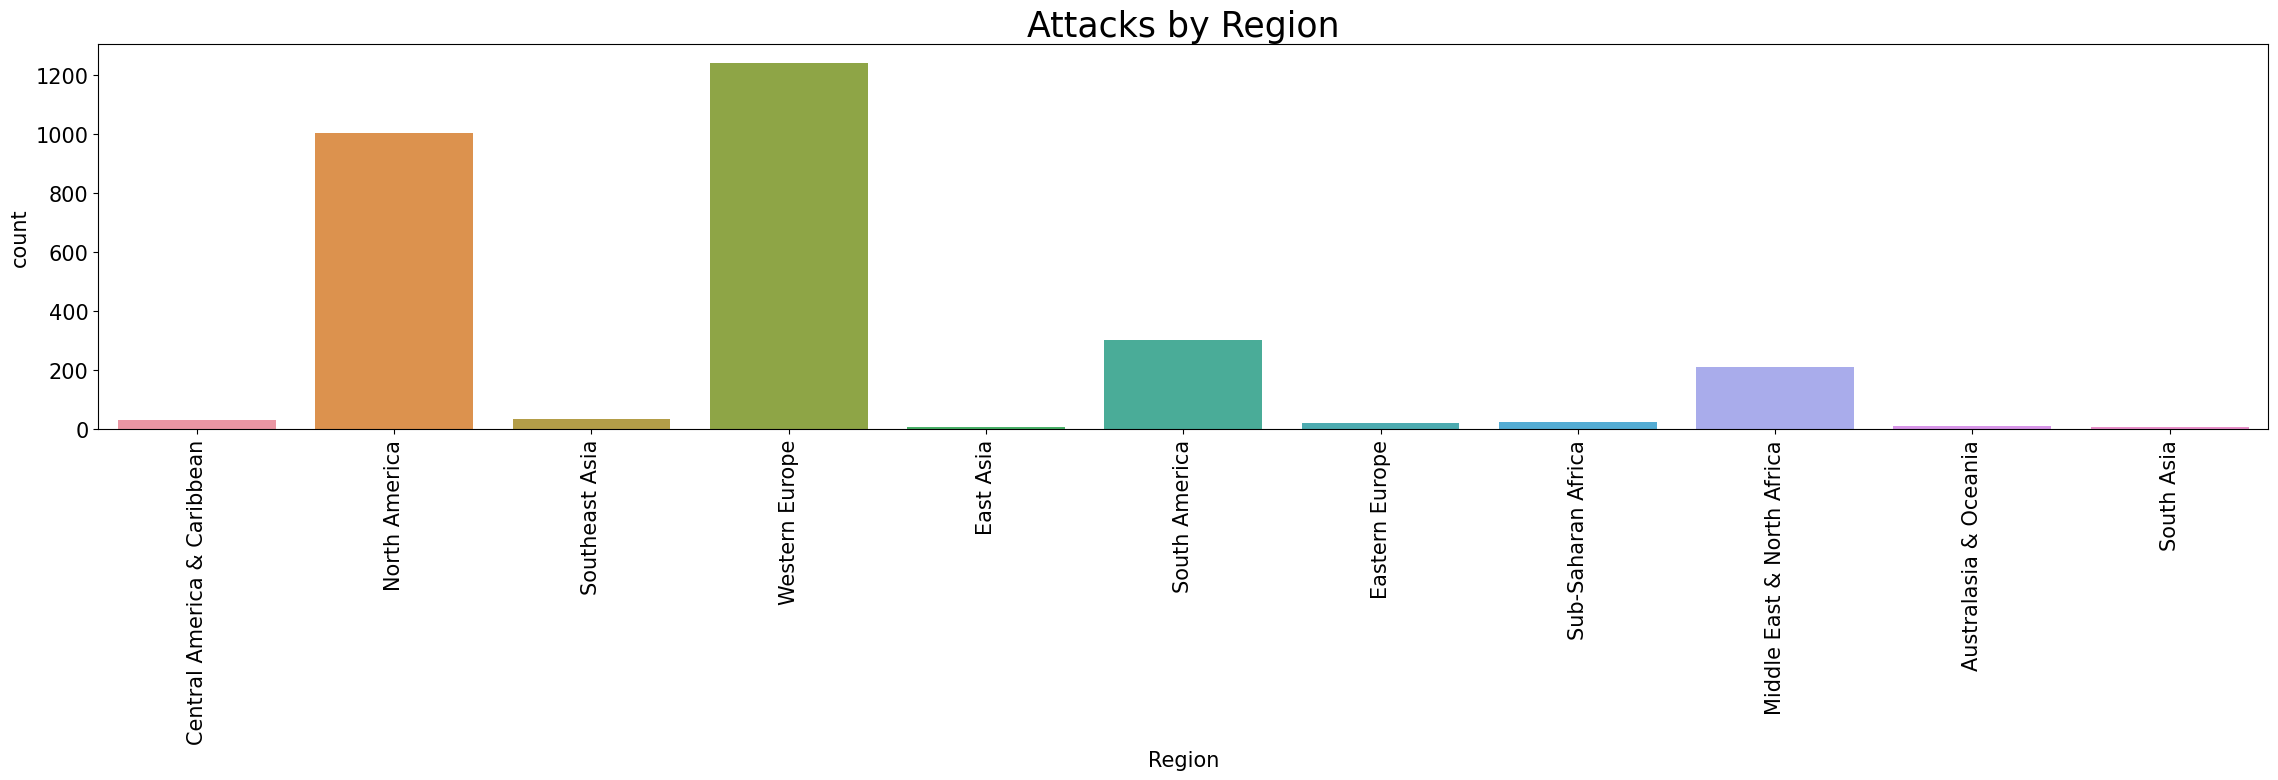

In [51]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Attacks by Region', fontsize =25)
sns.countplot(x=terrorism_df.Region);

#### Attack based on target type

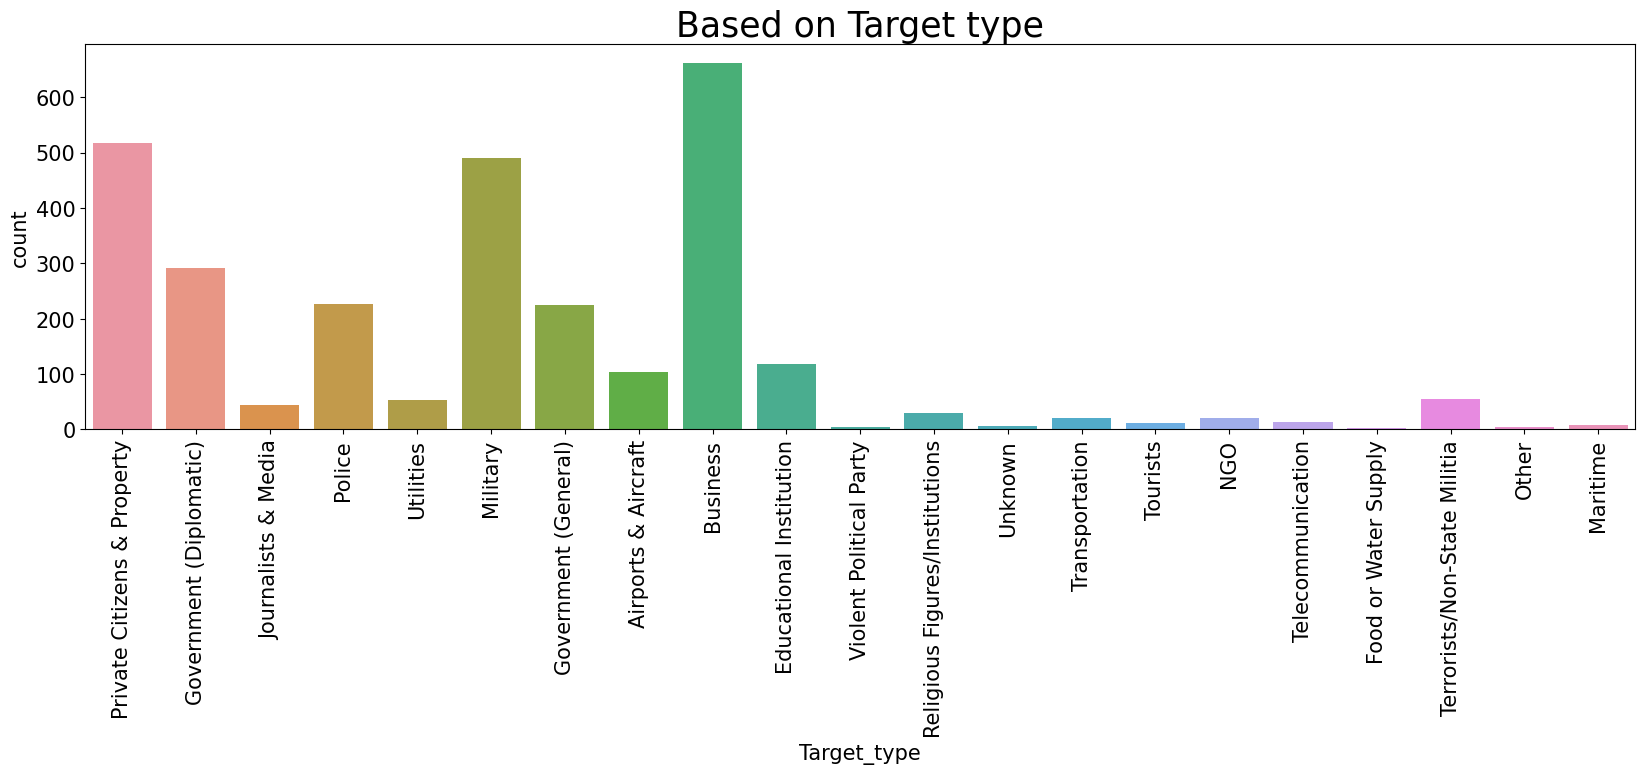

In [49]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Target type', fontsize =25)
sns.countplot(x=terrorism_df.Target_type);

#### Attacks based on attack type

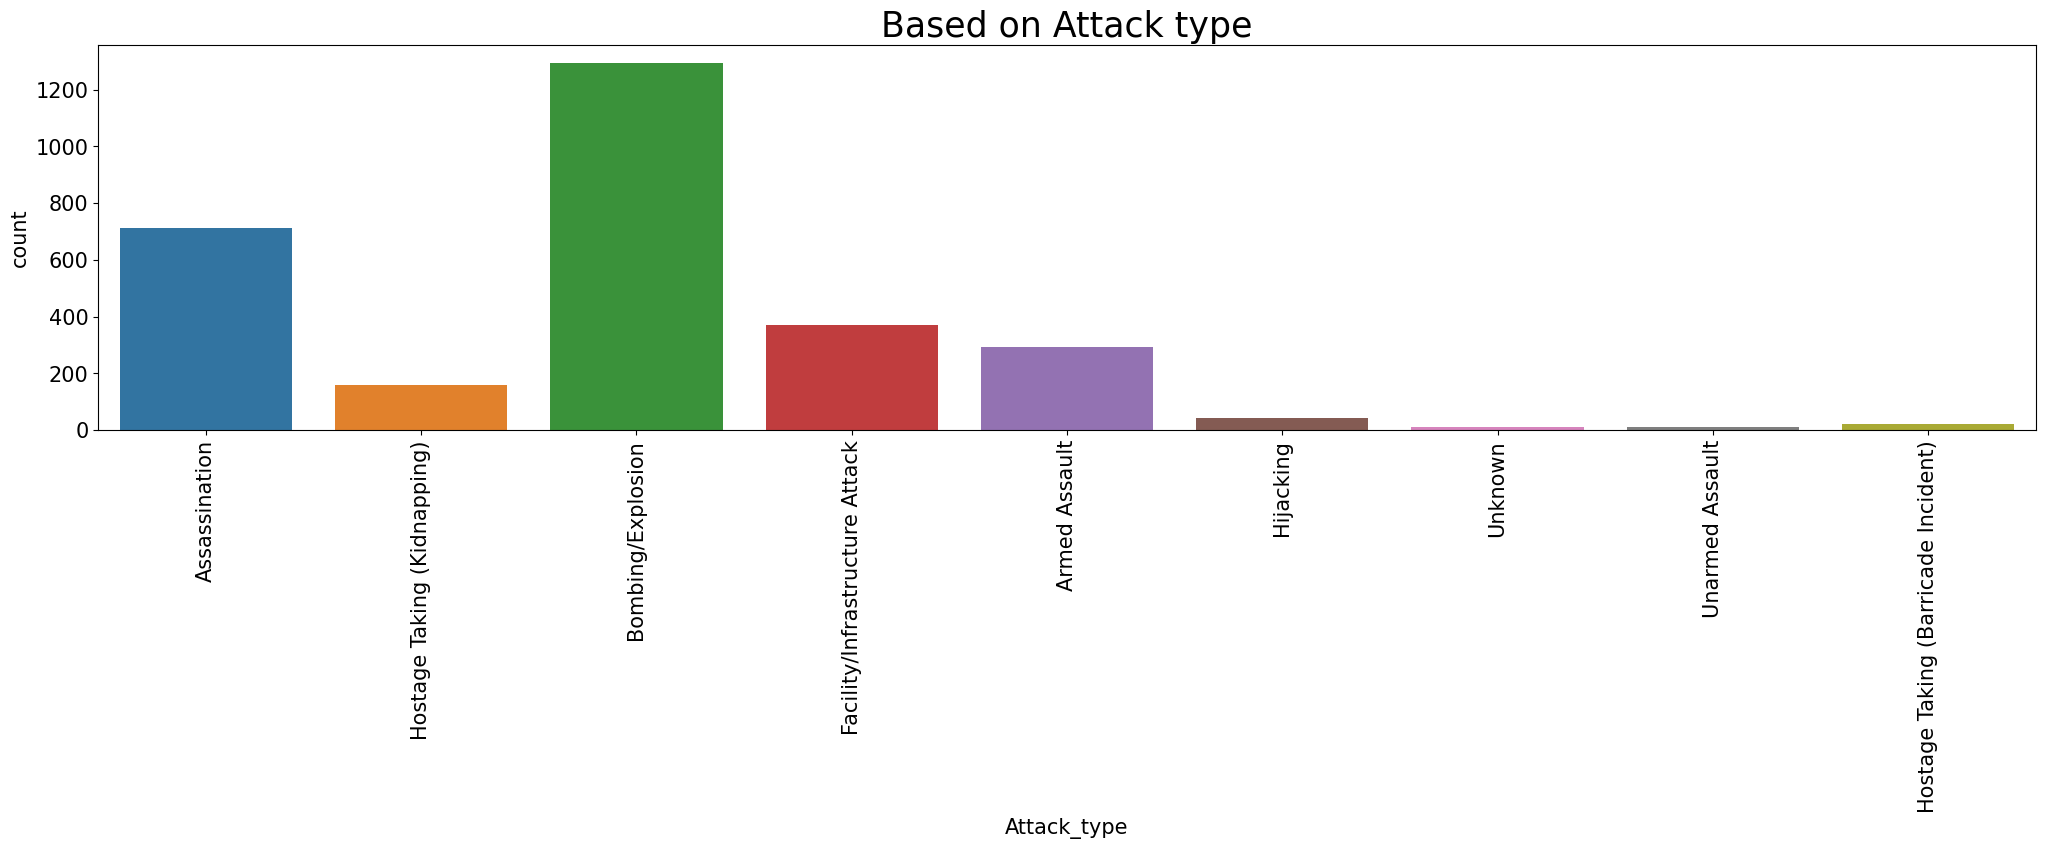

In [50]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Attack type', fontsize = 25)
sns.countplot(x=terrorism_df.Attack_type);

#### Result of Analysis

After observing different graphs, we obtained the following results:

Explosive : Most used weapon type in attacks

2014 : Most number of attacks year

5th month(May) : Most number of attacks month

15th day of month : Most number of attacks day

Iraq : Most attacked country

Baghdad : Most attacked State

Middle East and North America : Most attacked region

Private Citizens and Property : Most attack based on target type

Bombing /Explosion : Most attack based on attack type